Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/07_TextMining'
except ImportError as e:
    pass

# Text Mining

Other than the structured datasets that we have used so far, text documents contain **unstructured data**.
This means that we must [create features](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) from the text and turn it into **structured data**, before we can apply the clustering and classification methods that we have seen already.

The usual steps in a text preprocessing pipeline are:

- Tokenisation
    - Break text into words or n-grams
    - “example text”
        - (“example”, “text”)
        - (“exam”, “xamp”, “ampl”, “mple”, “ple”, “le t”, “e te”, “tex”, “text”)
- Stopword Removal
    - Remove frequent words that may confuse your algorithm
    - “this is an example” -> “example”
- Stemming
    - Finding the root/stem of a word helps matching similar words
    - “user”,“users”,“used”,“using” -> “use”
- Vectorisation
    - Transform the tokens into numerical features

It's a good idea to also look at the [Working With Text Data Tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) for scikit-learn.

## Loading files

The [load_files function](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html) can load datasets where each example is stored in an individual text file.
It assumes the following directory structure:
- **container_folder/**
    - *category_1_folder/*
        - file_1.txt file_2.txt … file_42.txt
    - *category_2_folder/*
        - file_43.txt file_44.txt …

Every *category_folder* will be considered as a class for the target variable.

Important parameters are:
- ```categories```: The names of the sub folder that should be loaded.
- ```encoding```: The encoding of the text files.

The returned object contains the following attributes:
- ```data```: the loaded text documents
- ```filenames```: the names of the files from which the text was loaded
- ```target_names```: the names of the classes, i.e., the category folders
- ```target```: the class values as integers

In [2]:
from sklearn.datasets import load_files

# load all subdirectories of the corpus-30docs directory
corpus_30_docs = load_files('DataSetEx7/corpus-30docs',encoding='utf-8')

# load the 'corpus-4docs' directory in the 'DataSetEx6' directory
corpus_4_docs = load_files('DataSetEx7', categories=['corpus-4docs'], encoding='utf-8') 

# show the first 30 characters of each document
print("First 30 characters of the 4docs corpus:")
for text in corpus_4_docs.data:
    print("\t" + text[:30])

First 30 characters of the 4docs corpus:
	An Occupation for the 99 Per C
	Málaga vs. Real Madrid Barcelo
	Real Madrid Slips Into First W
	David Cameron Joins Talks On E


### Feature Generation fromText

To create structured features form unstructured text, we must at least tokenise the text using a **tokenizer** and then turn the tokens into numerical features using a **vectorizer**.

We will consider the following vectorisers, which apply a tokeniser internally:
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    - set ```binary=True``` to generate **Binary Term Occurrence** vectors
    - set ```binary=False``` (default) to generate **Term Occurrence** vectors
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
    - set ```use_idf=False``` to generate **Term Frequency** vectors
    - set ```use_idf=True``` to generate **Term Frequency - Inverse Document Frequency** vectors
    
    
Sample document set:
- d1 = "Saturn is the gas planet with the rings."
- d2 = "Jupiter is the largest gas planet."
- d3 = "Saturn is the Roman god of sowing."

### Feature Generation Examples – (Binary) Term Occurrences

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

d1 = "Saturn is the gas planet with the rings."
d2 = "Jupiter is the largest gas planet."
d3 = "Saturn is the Roman god of sowing."
docs = [d1, d2, d3]

vectorizer = CountVectorizer(binary=True)
matrix = vectorizer.fit_transform(docs)

print("Vectorizer created {} features.".format(len(vectorizer.get_feature_names_out())))

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

Vectorizer created 13 features.


gas  god  is  jupiter  largest  of  planet  rings  roman  saturn  sowing  \
0    1    0   1        0        0   0       1      1      0       1       0   
1    1    0   1        1        1   0       1      0      0       0       0   
2    0    1   1        0        0   1       0      0      1       1       1   

   the  with  
0    1     1  
1    1     0  
2    1     0

Have a look at the value for 'the' at document 0.
If binary is true we only have a value of 1 and not 2.

In [4]:
vectorizer = CountVectorizer(binary=False)
matrix = vectorizer.fit_transform(docs)
features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

gas  god  is  jupiter  largest  of  planet  rings  roman  saturn  sowing  \
0    1    0   1        0        0   0       1      1      0       1       0   
1    1    0   1        1        1   0       1      0      0       0       0   
2    0    1   1        0        0   1       0      0      1       1       1   

   the  with  
0    2     1  
1    1     0  
2    1     0

### Feature Generation Examples –Term Frequency

if using l1 norm, the computation formual is $\frac{\textrm{term occurrence}}{\textrm{number of terms in document}}$

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

gas       god        is   jupiter   largest        of    planet  \
0  0.125000  0.000000  0.125000  0.000000  0.000000  0.000000  0.125000   
1  0.166667  0.000000  0.166667  0.166667  0.166667  0.000000  0.166667   
2  0.000000  0.142857  0.142857  0.000000  0.000000  0.142857  0.000000   

   rings     roman    saturn    sowing       the   with  
0  0.125  0.000000  0.125000  0.000000  0.250000  0.125  
1  0.000  0.000000  0.000000  0.000000  0.166667  0.000  
2  0.000  0.142857  0.142857  0.142857  0.142857  0.000

if using l2 norm, the computation formual is $\frac{\textrm{term occurrence}}{\sqrt{\sum_{term \in document}\textrm{(occurrence of term)} ^2 }}$

In [6]:
vectorizer = TfidfVectorizer(use_idf=False, norm='l2')
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

gas       god        is   jupiter   largest        of    planet  \
0  0.316228  0.000000  0.316228  0.000000  0.000000  0.000000  0.316228   
1  0.408248  0.000000  0.408248  0.408248  0.408248  0.000000  0.408248   
2  0.000000  0.377964  0.377964  0.000000  0.000000  0.377964  0.000000   

      rings     roman    saturn    sowing       the      with  
0  0.316228  0.000000  0.316228  0.000000  0.632456  0.316228  
1  0.000000  0.000000  0.000000  0.000000  0.408248  0.000000  
2  0.000000  0.377964  0.377964  0.377964  0.377964  0.000000

### Feature Generation Examples – Term Frequency - Inverse Document Frequency

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

gas       god        is   jupiter   largest        of    planet  \
0  0.324900  0.000000  0.252314  0.000000  0.000000  0.000000  0.324900   
1  0.387376  0.000000  0.300832  0.509353  0.509353  0.000000  0.387376   
2  0.000000  0.435357  0.257129  0.000000  0.000000  0.435357  0.000000   

      rings     roman  saturn    sowing       the      with  
0  0.427205  0.000000  0.3249  0.000000  0.504628  0.427205  
1  0.000000  0.000000  0.0000  0.000000  0.300832  0.000000  
2  0.000000  0.435357  0.3311  0.435357  0.257129  0.000000

idf = $\log\frac{\textrm{number of documents}}{\textrm{number of documents where term occurs}}+1$

### Removing stopwords

To filter out stop words, we set the ```stop_words``` parameter to a list of tokens we provide or simply to ```'english'``` to use a default set of stop words. This works for both vectorizers.

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')

matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

gas       god   jupiter   largest    planet     rings     roman  \
0  0.459854  0.000000  0.000000  0.000000  0.459854  0.604652  0.000000   
1  0.428046  0.000000  0.562829  0.562829  0.428046  0.000000  0.000000   
2  0.000000  0.528635  0.000000  0.000000  0.000000  0.000000  0.528635   

     saturn    sowing  
0  0.459854  0.000000  
1  0.000000  0.000000  
2  0.402040  0.528635

### Apply stemming

Stemming is not directly avaiable via a parameter, but we can provide our own tokenizer that applies stemming. If we want to remove stopwords, we have to do that before stemming.

In [9]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

import re, string

token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    my_stopwords = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize)
matrix = stem_vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names_out())
display(features)

ga       god     jupit   largest    planet      ring     roman  \
0  0.459854  0.000000  0.000000  0.000000  0.459854  0.604652  0.000000   
1  0.428046  0.000000  0.562829  0.562829  0.428046  0.000000  0.000000   
2  0.000000  0.528635  0.000000  0.000000  0.000000  0.000000  0.528635   

     saturn       sow  
0  0.459854  0.000000  
1  0.000000  0.000000  
2  0.402040  0.528635

### Computing similiarity scores

To calculate the similarity between two documents, you can use any of the [pair-wise metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise) provided by scikit-learn (see also the [user guide](https://scikit-learn.org/stable/modules/metrics.html)).

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

sim = pd.DataFrame(cosine_similarity(matrix))
display(sim)

0         1        2
0  1.000000  0.393677  0.18488
1  0.393677  1.000000  0.00000
2  0.184880  0.000000  1.00000

### Feature Selection

The feature creation shown above can create a very large amount of features! But not all of these features are helpful for your task. Its often a good idea to prune too frequent or too infrequent tokens to reduce the amount of features.

Both vectorisers support pruning with the following parameters:
- ```min_df```: Removes all features which occur in less than X examples. X is interpreted as absolute number of examples if it is an integer, and as a percentage of all examples if it is a float.
- ```max_df```: Removes all features which occur in more than X examples.  X is interpreted as absolute number of examples if it is an integer, and as a percentage of all examples if it is a float.
- ```max_features```: Only keep the X most frequently occurring features


In [12]:
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3) # Percentual
vectorizer = TfidfVectorizer(min_df=5, max_df=20) # Absolute

### Inspecting Token Frequencies By Class

The following code lets you inspect the frequencies of all created tokens, grouped by the value of the target variable. Inspecting this data can help you to decide how you can reasonably prune your features and get an understanding of the differences between the classes in your dataset.

In [13]:
import pandas as pd

def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

In [14]:
count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(corpus_30_docs.data)

word_list = generate_word_list(count_matrix, corpus_30_docs.target, count_vectorizer.get_feature_names_out(), corpus_30_docs.target_names)
display(word_list)

sci.space  soc.religion.christian  talk.politics.guns  \
edu               85                      99                  97   
cs                37                      19                  40   
cmu               27                      24                  29   
com               23                      10                  37   
christian          0                      64                   0   
...              ...                     ...                 ...   
glen               1                       0                   0   
glad               0                       1                   0   
giss               1                       0                   0   
girl               0                       0                   1   
zoolog             1                       0                   0   

           total_occurrences  document_occurrences  
edu                      281                    30  
cs                        96                    30  
cmu                       80                    30  
com                       70                    23  
christian                 64                    10  
...                      ...                   ...  
glen                       1                     1  
glad                       1                     1  
giss                       1                     1  
girl                       1                     1  
zoolog                     1                     1  

[2950 rows x 5 columns]

### Try it out yourself
- Task 7.1.1
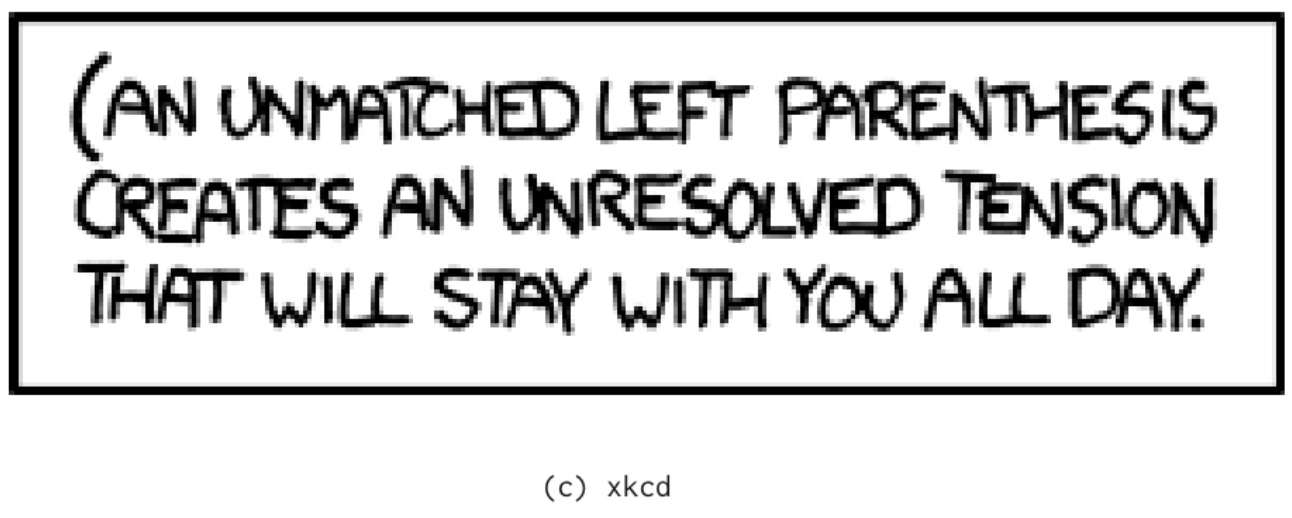